In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
#Import the Data
data = pd.read_csv("CWC23_all_innings.csv")
data.head()            

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [63]:
#Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [64]:
#statistics of the data
data.describe()

,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
count,1408.000000,1408.000000,562.000000,1408.000000,1408.000000,562.000000,562.000000,562.000000,1408.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,35.305398,33.237216,1.204626,0.070574,0.898755,7.342527,0.256228,5.946637,1.470881,2.605201,0.751773,83.716596,0.151300,42.721040
std,25.248709,28.056329,1.198237,0.152535,0.471051,2.679736,0.532547,2.141566,0.499329,3.146922,1.504184,52.475444,0.358553,41.576908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,1.350000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.750000,11.000000,0.000000,0.010724,0.621350,5.550000,0.000000,4.500000,1.000000,0.000000,0.000000,51.610000,0.000000,12.000000
50%,32.000000,29.000000,1.000000,0.032258,0.879005,8.000000,0.000000,5.675000,1.000000,2.000000,0.000000,81.810000,0.000000,28.000000
75%,54.000000,49.000000,2.000000,0.062500,1.130819,10.000000,0.000000,7.120000,2.000000,4.000000,1.000000,107.020000,0.000000,60.000000
max,143.000000,201.000000,7.000000,1.000000,6.000000,10.000000,3.000000,16.000000,2.000000,21.000000,11.000000,600.000000,1.000000,217.000000


In [65]:
data.isnull().count()

team               1408
player             1408
bat_or_bowl        1408
bb_bf              1408
runs               1408
wkts               1408
wicketball_prob    1408
runs_per_ball      1408
opposition         1408
ground             1408
start_date         1408
overs              1408
mdns               1408
econ               1408
inns               1408
4s                 1408
6s                 1408
sr                 1408
not_out            1408
mins               1408
dtype: int64

In [66]:
#Converts Month to day of month and Remove 'v' from Opposition column
data['start_date']=pd.to_datetime(data['start_date']) 
data['opposition']=data['opposition'].replace('v','')
data.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,2023-10-27,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,2023-10-29,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,2023-10-05,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,2023-10-13,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,2023-10-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


1.Team Performance Analysis

In [67]:
#Gives total score of batting per country in CWC23
print("Total Score of Batting Teams per Country")
data[data['bat_or_bowl']=='bat'].groupby('team')['runs'].sum()

Total Score of Batting Teams per Country


team
AFG    1990
AUS    2722
BAN    1944
ENG    2135
IND    2810
NED    1728
NZ     2712
PAK    2220
SA     2773
SL     1942
Name: runs, dtype: int64

In [68]:
#Gives total score of bowling per country in CWC23
print("Total Wkts of Bowling Teams per Country")
data[data['bat_or_bowl']=='bowl'].groupby('team')['wkts'].sum()

Total Wkts of Bowling Teams per Country


team
AFG    53.0
AUS    77.0
BAN    51.0
ENG    65.0
IND    94.0
NED    63.0
NZ     71.0
PAK    65.0
SA     88.0
SL     50.0
Name: wkts, dtype: float64

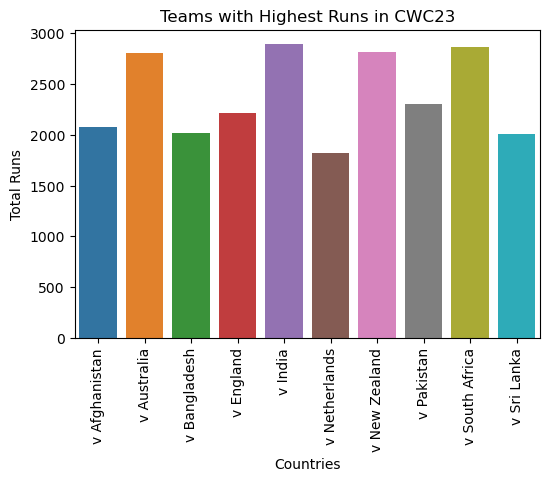

In [69]:
#Gives the Teams having Highest Runs in CWC23
plt.figure(figsize=(6,4))
team_runs=data[data['bat_or_bowl']=='bowl'].groupby('opposition')['runs'].sum()
sns.barplot(x=team_runs.index,y=team_runs.values)
plt.xlabel("Countries")
plt.ylabel("Total Runs")
plt.title("Teams with Highest Runs in CWC23")
plt.xticks(rotation=90)
plt.show()

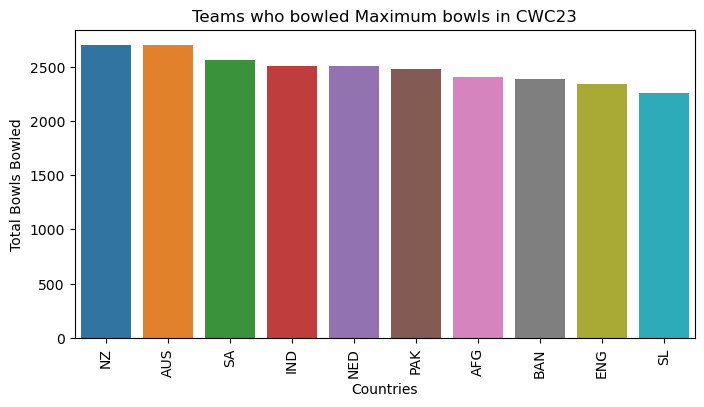

In [70]:
#Gives the Teams who Bowled Highest Bowls
plt.figure(figsize=(8,4))
team_bowls=data[data['bat_or_bowl']=='bowl'].groupby('team')['bb_bf'].sum().sort_values(ascending=False)
sns.barplot(x=team_bowls.index,y=team_bowls.values)
plt.xlabel("Countries")
plt.ylabel("Total Bowls Bowled")
plt.title("Teams who bowled Maximum bowls in CWC23")
plt.xticks(rotation=90)
plt.show()

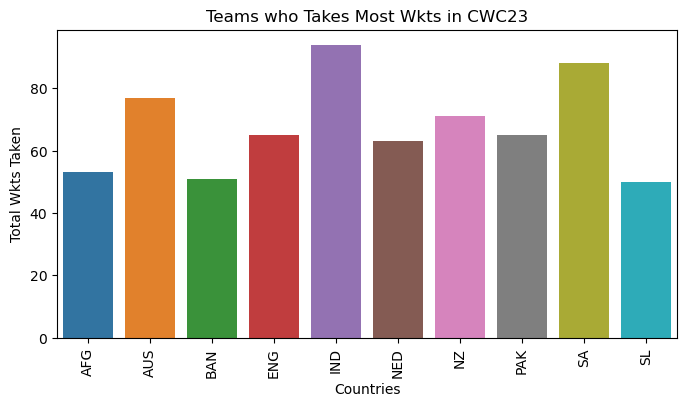

In [71]:
#Gives the Teams who Takes Highest Wkts
plt.figure(figsize=(8,4))
team_wkts=data[data['bat_or_bowl']=='bowl'].groupby('team')['wkts'].sum()
sns.barplot(x=team_wkts.index,y=team_wkts.values)
plt.xlabel("Countries")
plt.ylabel("Total Wkts Taken")
plt.title("Teams who Takes Most Wkts in CWC23")
plt.xticks(rotation=90)
plt.show()

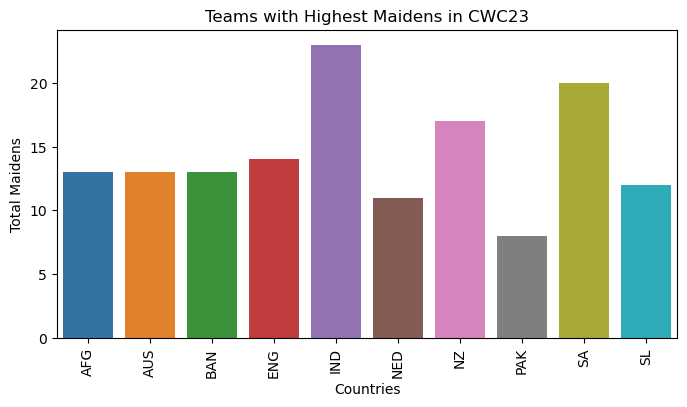

In [72]:
#Gives the Teams who Takes Highest Maiden Ovrs
plt.figure(figsize=(8,4))
team_mdns=data[data['bat_or_bowl']=='bowl'].groupby('team')['mdns'].sum()
sns.barplot(x=team_mdns.index,y=team_mdns.values)
plt.xlabel("Countries")
plt.ylabel("Total Maidens")
plt.title("Teams with Highest Maidens in CWC23")
plt.xticks(rotation=90)
plt.show()

2. Player Performance Analysis

In [73]:
#Gives total score for batting of each player per Team
print("Total Score for Batting of each player")
data[data['bat_or_bowl']=='bat'].groupby(['team','player'])['runs'].sum()


Total Score for Batting of each player


team  player                    
AFG   Azmatullah Omarzai (AFG)      353
      Fazalhaq Farooqi (AFG)          2
      Hashmatullah Shahidi (AFG)    310
      Ibrahim Zadran (AFG)          376
      Ikram Alikhil (AFG)            89
                                   ... 
SL    MD Shanaka (SL)                80
      MDKJ Perera (SL)              149
      P Nissanka (SL)               332
      PVD Chameera (SL)               6
      S Samarawickrama (SL)         373
Name: runs, Length: 146, dtype: int64

In [74]:
#Gives total wkts for bowling of each player per Team
print("Total Wkts of Bowling Teams of each player")
data[data['bat_or_bowl']=='bowl'].groupby(['team','player'])['wkts'].sum()

Total Wkts of Bowling Teams of each player


team  player                  
AFG   Azmatullah Omarzai (AFG)    7.0
      Fazalhaq Farooqi (AFG)      6.0
      Mohammad Nabi (AFG)         8.0
      Mujeeb Ur Rahman (AFG)      8.0
      Naveen-ul-Haq (AFG)         8.0
                                 ... 
SL    M Pathirana (SL)            2.0
      M Theekshana (SL)           6.0
      MADI Hemantha (SL)          0.0
      MD Shanaka (SL)             0.0
      PVD Chameera (SL)           2.0
Name: wkts, Length: 103, dtype: float64

player
V Kohli (IND)               711
Q de Kock (SA)              594
R Ravindra (NZ)             578
DJ Mitchell (NZ)            552
RG Sharma (IND)             550
DA Warner (AUS)             528
SS Iyer (IND)               526
HE van der Dussen (SA)      448
MR Marsh (AUS)              426
AK Markram (SA)             406
DJ Malan (ENG)              404
GJ Maxwell (AUS)            398
Mohammad Rizwan (PAK)       395
KL Rahul (IND)              386
Ibrahim Zadran (AFG)        376
H Klaasen (SA)              373
S Samarawickrama (SL)       373
DP Conway (NZ)              372
DA Miller (SA)              356
Azmatullah Omarzai (AFG)    353
Name: runs, dtype: int64


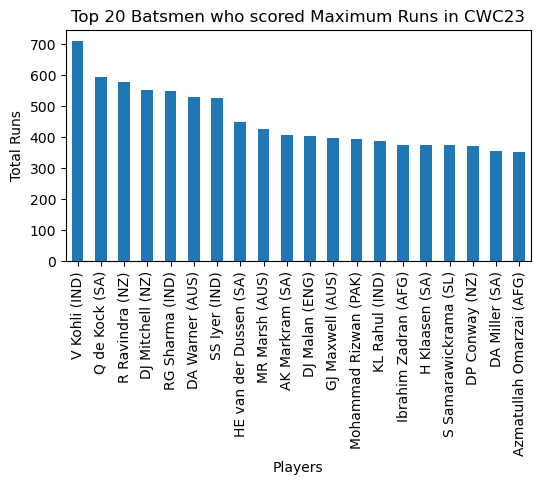

In [75]:
#Top 20 Players containing Maximum Runs in CWC23
top_players = data[data['bat_or_bowl'] == 'bat'].groupby(['player'])['runs'].sum().sort_values(ascending=False)
print(top_players.head(20))

#Visualization
#Plotting the bar chart
plt.figure(figsize=(6,3))
bars = top_players.head(20).plot(kind='bar')
plt.xlabel("Players")
plt.ylabel("Total Runs")
plt.title("Top 20 Batsmen who scored Maximum Runs in CWC23")
plt.show()

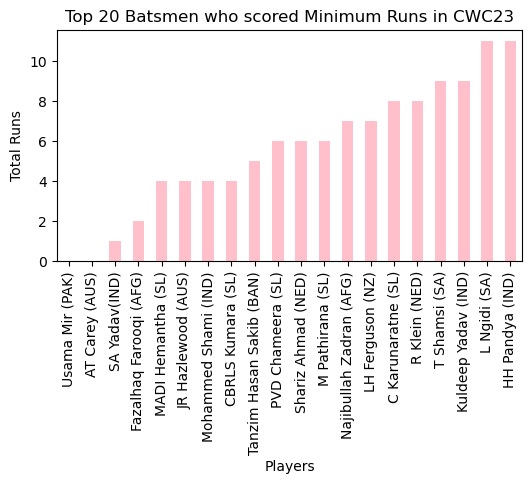

In [76]:
#Top 20 Players containing Lowest Runs in CWC23
bottom_players = data[data['bat_or_bowl'] == 'bat'].groupby(['player'])['runs'].sum().sort_values(ascending=True)

#Plotting the bar chart
plt.figure(figsize=(6,3))
bars = bottom_players.head(20).plot(kind='bar',color='pink')
plt.xlabel("Players")
plt.ylabel("Total Runs")
plt.title("Top 20 Batsmen who scored Minimum Runs in CWC23")
plt.show()

player
RG Sharma (IND)             28.0
DA Warner (AUS)             24.0
SS Iyer (IND)               24.0
DJ Mitchell (NZ)            22.0
GJ Maxwell (AUS)            22.0
Q de Kock (SA)              21.0
DA Miller (SA)              20.0
MR Marsh (AUS)              20.0
H Klaasen (SA)              19.0
Fakhar Zaman (PAK)          18.0
R Ravindra (NZ)             17.0
BKG Mendis (SL)             15.0
Mahmudullah (BAN)           14.0
GD Phillips (NZ)            14.0
Azmatullah Omarzai (AFG)    13.0
Shubman Gill (IND)          12.0
KIC Asalanka (SL)           11.0
BA Stokes (ENG)             11.0
AT Nidamanuru (NED)         10.0
Rahmanullah Gurbaz (AFG)     9.0
Name: 6s, dtype: float64


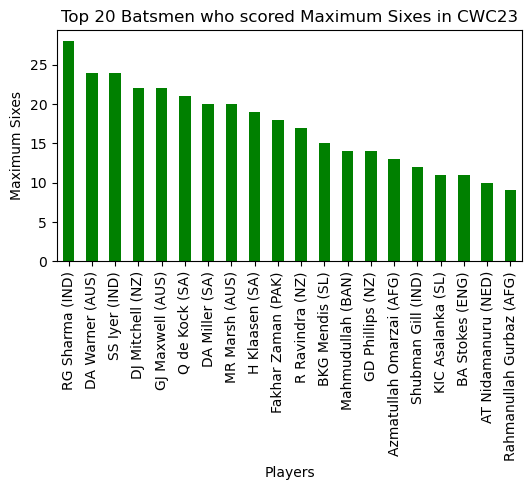

In [77]:
#Gives the Most Sixes Hitting by the Batsman in CWC23
six_hitted = data[data['bat_or_bowl']=='bat'].groupby('player')['6s'].sum().sort_values(ascending=False)
print(six_hitted.head(20))

#Plotting the bar chart
plt.figure(figsize=(6,3))
bars = six_hitted.head(20).plot(kind='bar',color='green')
plt.xlabel("Players")
plt.ylabel("Maximum Sixes")
plt.title("Top 20 Batsmen who scored Maximum Sixes in CWC23")
plt.show()

player
V Kohli (IND)              64.0
RG Sharma (IND)            62.0
Q de Kock (SA)             57.0
R Ravindra (NZ)            55.0
DP Conway (NZ)             54.0
DJ Malan (ENG)             50.0
DA Warner (AUS)            49.0
DJ Mitchell (NZ)           48.0
P Nissanka (SL)            44.0
AK Markram (SA)            44.0
MR Marsh (AUS)             42.0
Shubman Gill (IND)         41.0
GJ Maxwell (AUS)           40.0
HE van der Dussen (SA)     39.0
Ibrahim Zadran (AFG)       39.0
Mohammad Rizwan (PAK)      38.0
KL Rahul (IND)             37.0
S Samarawickrama (SL)      36.0
Abdullah Shafique (PAK)    36.0
SS Iyer (IND)              36.0
Name: 4s, dtype: float64


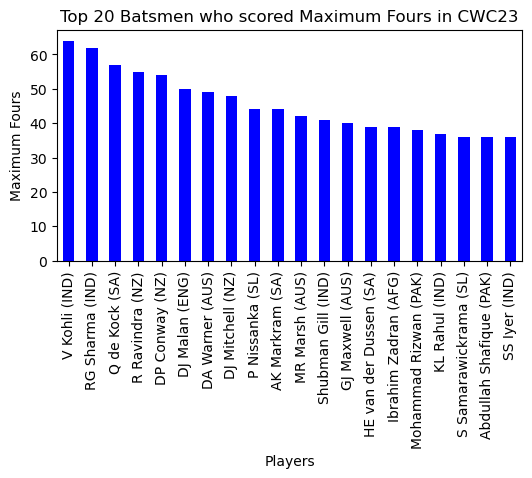

In [78]:
#Gives the Most Fours Hitting by the Batsman in CWC23
fours_hitted = data[data['bat_or_bowl']=='bat'].groupby('player')['4s'].sum().sort_values(ascending=False)
print(fours_hitted.head(20))

#Plotting the bar chart
plt.figure(figsize=(6,3))
bars = fours_hitted.head(20).plot(kind='bar',color='blue')
plt.xlabel("Players")
plt.ylabel("Maximum Fours")
plt.title("Top 20 Batsmen who scored Maximum Fours in CWC23")
plt.show()

player
AK Markram (SA)         15.152500
RG Sharma (IND)         12.552630
DA Miller (SA)          12.334600
H Klaasen (SA)          12.319500
DA Warner (AUS)         10.819952
GD Phillips (NZ)        10.759000
Q de Kock (SA)          10.653900
DJ Willey (ENG)          9.836000
JC Buttler (ENG)         9.531900
DJ Mitchell (NZ)         9.498800
R Ravindra (NZ)          9.456700
SS Iyer (IND)            9.300502
Iftikhar Ahmed (PAK)     9.210200
KL Rahul (IND)           9.061750
DP Conway (NZ)           8.745600
Shubman Gill (IND)       8.713250
V Kohli (IND)            8.295614
MJ Santner (NZ)          8.252400
AU Rashid (ENG)          8.246800
GJ Maxwell (AUS)         8.140100
Name: runs_per_ball, dtype: float64


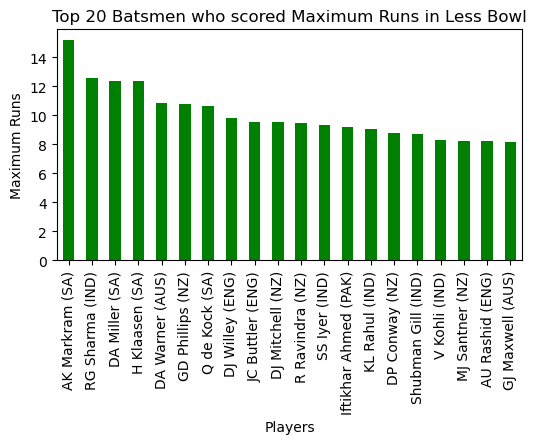

In [79]:
#Gives the Player with Highest Runs in Less Bowl in CWC23
runs_per_bowl = data[data['bat_or_bowl']=='bat'].groupby('player')['runs_per_ball'].sum().sort_values(ascending=False)
print(runs_per_bowl.head(20))

#Plotting the bar chart
plt.figure(figsize=(6,3))
bars = runs_per_bowl.head(20).plot(kind='bar',color='green')
plt.xlabel("Players")
plt.ylabel("Maximum Runs")
plt.title("Top 20 Batsmen who scored Maximum Runs in Less Bowl")
plt.show()

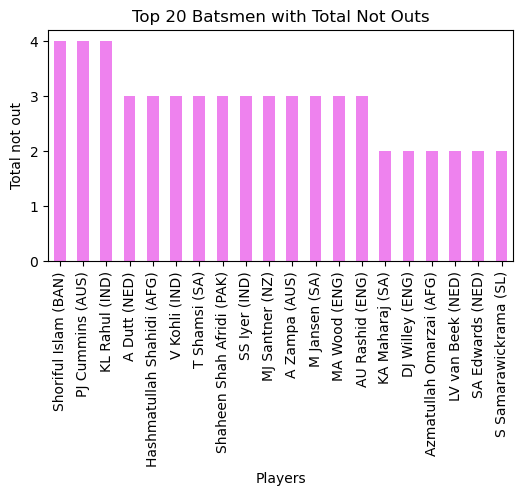

In [80]:
#Gives Top total players who are Not Out
total_not_outs=data[data['bat_or_bowl']=='bat'].groupby('player')['not_out'].sum().sort_values(ascending=False)
total_not_outs.head(20)

#Plotting the bar chart
plt.figure(figsize=(6,3))
bars = total_not_outs.head(20).plot(kind='bar',color='violet')
plt.xlabel("Players")
plt.ylabel("Total not out")
plt.title("Top 20 Batsmen with Total Not Outs")
plt.show()

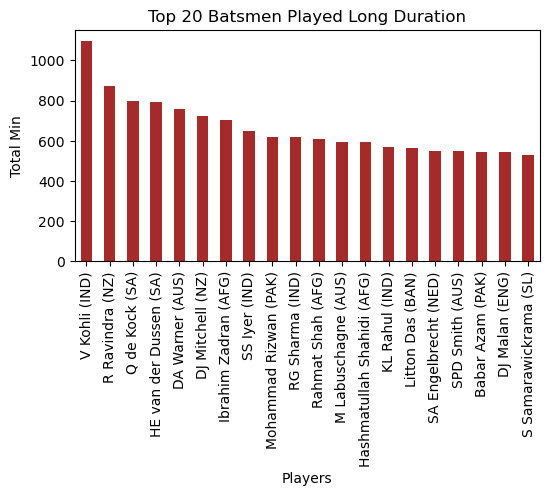

In [81]:
#Gives the top 20 Players who played for Long Duration
top_20=data[data['bat_or_bowl']=='bat'].groupby('player')['mins'].sum().sort_values(ascending=False)
top_20.head(20)

#Plotting the bar chart
plt.figure(figsize=(6,3))
bars = top_20.head(20).plot(kind='bar',color='brown')
plt.xlabel("Players")
plt.ylabel("Total Min")
plt.title("Top 20 Batsmen Played Long Duration")
plt.show()

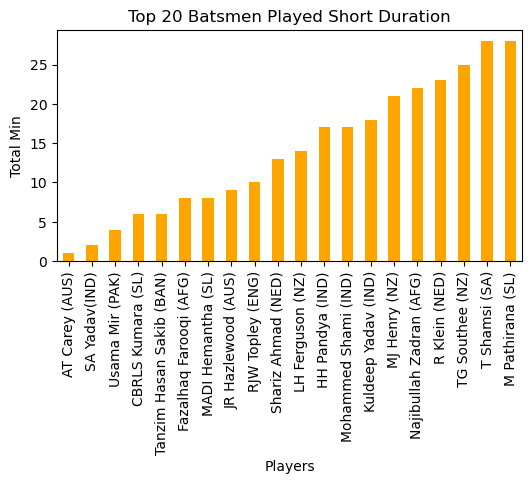

In [82]:
#Gives the top 20 Players who played for Short Duration
bot_20=data[data['bat_or_bowl']=='bat'].groupby('player')['mins'].sum().sort_values(ascending=True)
bot_20.head(20)

#Plotting the bar chart
plt.figure(figsize=(6,3))
bars = bot_20.head(20).plot(kind='bar',color='orange')
plt.xlabel("Players")
plt.ylabel("Total Min")
plt.title("Top 20 Batsmen Played Short Duration")
plt.show()

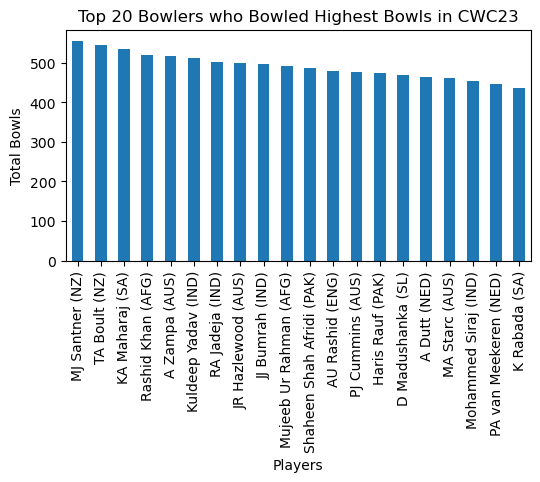

In [83]:
#Gives Most Balls Bowled in CWC23
balls_bowled = data[data['bat_or_bowl'] == 'bowl'].groupby(['player'])['bb_bf'].sum().sort_values(ascending=False)
                
# Plotting the bar chart
plt.figure(figsize=(6,3))
bars = balls_bowled.head(20).plot(kind='bar')
plt.xlabel("Players")
plt.ylabel("Total Bowls")
plt.title("Top 20 Bowlers who Bowled Highest Bowls in CWC23")
plt.show()

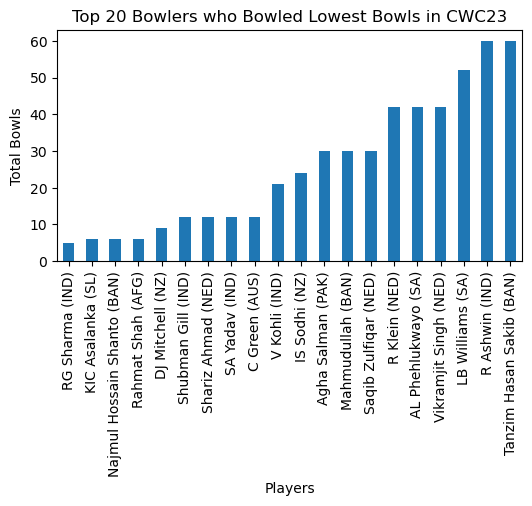

In [84]:
#Gives Less Balls Bowled in CWC23
balls_bowled = data[data['bat_or_bowl'] == 'bowl'].groupby(['player'])['bb_bf'].sum().sort_values(ascending=True)
                
# Plotting the bar chart
plt.figure(figsize=(6,3))
bars = balls_bowled.head(20).plot(kind='bar')
plt.xlabel("Players")
plt.ylabel("Total Bowls")
plt.title("Top 20 Bowlers who Bowled Lowest Bowls in CWC23")
plt.show()

player
Haris Rauf (PAK)             533
D Madushanka (SL)            525
TA Boult (NZ)                504
BFW de Leede (NED)           487
Shaheen Shah Afridi (PAK)    481
PJ Cummins (AUS)             481
LV van Beek (NED)            476
MA Starc (AUS)               473
A Zampa (AUS)                471
Mujeeb Ur Rahman (AFG)       458
M Jansen (SA)                450
MJ Santner (NZ)              449
PA van Meekeren (NED)        447
A Dutt (NED)                 426
Mohammed Siraj (IND)         424
AU Rashid (ENG)              413
Shoriful Islam (BAN)         409
Mehidy Hasan Miraz (BAN)     402
Mustafizur Rahman (BAN)      398
G Coetzee (SA)               396
R Ravindra (NZ)              393
JR Hazlewood (AUS)           389
Rashid Khan (AFG)            388
M Theekshana (SL)            382
KA Maharaj (SA)              370
Kuldeep Yadav (IND)          368
K Rabada (SA)                364
RA Jadeja (IND)              355
L Ngidi (SA)                 355
Naveen-ul-Haq (AFG)          352
Nam

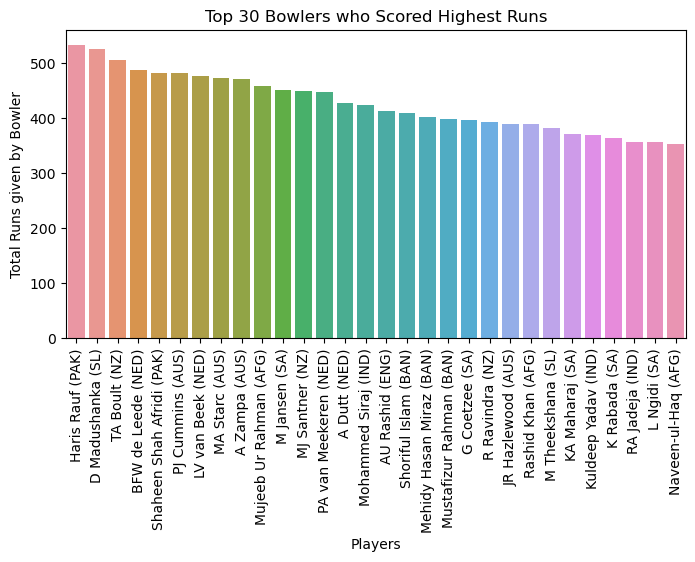

In [85]:
#Gives Top 30 Bowlers who gave Most Runs
more_runs=data[data['bat_or_bowl']=='bowl'].groupby('player')['runs'].sum().sort_values(ascending=False).head(30)
print(more_runs)

#Plotting Bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=more_runs.index,y=more_runs.values)
plt.xlabel("Players")
plt.ylabel("Total Runs given by Bowler")
plt.title("Top 30 Bowlers who Scored Highest Runs")
plt.xticks(rotation=90)
plt.show()

player
Mohammed Shami (IND)         23.0
A Zampa (AUS)                22.0
D Madushanka (SL)            21.0
G Coetzee (SA)               20.0
JJ Bumrah (IND)              18.0
Shaheen Shah Afridi (PAK)    18.0
M Jansen (SA)                17.0
MJ Santner (NZ)              16.0
Haris Rauf (PAK)             16.0
RA Jadeja (IND)              16.0
BFW de Leede (NED)           16.0
KA Maharaj (SA)              15.0
Kuldeep Yadav (IND)          15.0
AU Rashid (ENG)              15.0
JR Hazlewood (AUS)           14.0
TA Boult (NZ)                14.0
Mohammed Siraj (IND)         13.0
MA Starc (AUS)               13.0
PJ Cummins (AUS)             13.0
K Rabada (SA)                13.0
PA van Meekeren (NED)        12.0
LV van Beek (NED)            12.0
DJ Willey (ENG)              11.0
Rashid Khan (AFG)            11.0
MJ Henry (NZ)                11.0
Mehidy Hasan Miraz (BAN)     10.0
Mohammad Wasim (1) (PAK)     10.0
LH Ferguson (NZ)             10.0
L Ngidi (SA)                 10.0
Shorifu

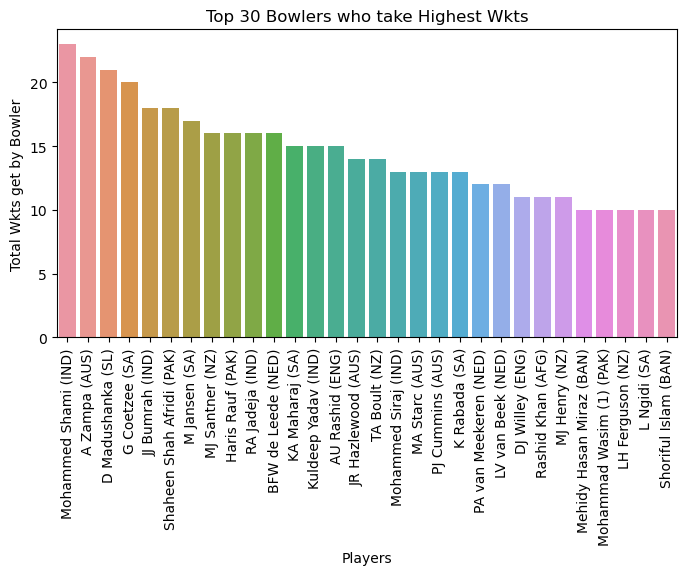

In [86]:
#Gives Top 30 Bowlers who get Most Wkts
more_wkts=data[data['bat_or_bowl']=='bowl'].groupby('player')['wkts'].sum().sort_values(ascending=False).head(30)
print(more_wkts)

#Plotting Bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=more_wkts.index,y=more_wkts.values)
plt.xlabel("Players")
plt.ylabel("Total Wkts get by Bowler")
plt.title("Top 30 Bowlers who take Highest Wkts")
plt.xticks(rotation=90)
plt.show()

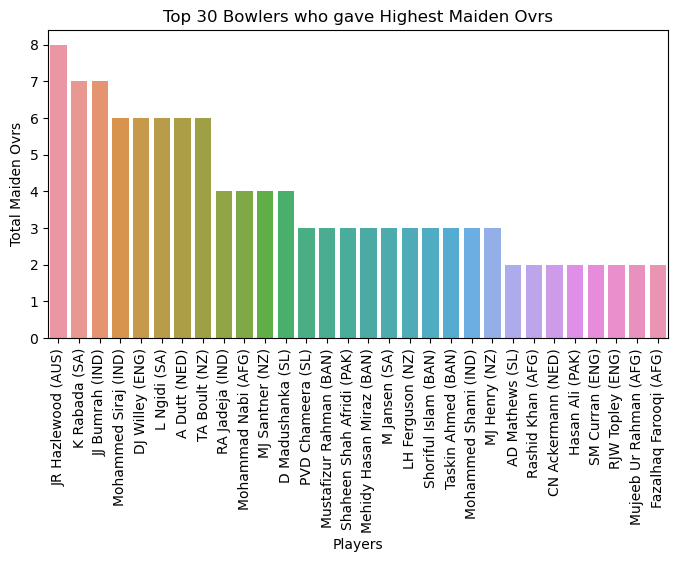

In [87]:
#Gives Top 30 Bowlers who gave Highest Maiden Overs
mdn_ovrs=data[data['bat_or_bowl']=='bowl'].groupby('player')['mdns'].sum().sort_values(ascending=False).head(30)

#Plotting Bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=mdn_ovrs.index,y=mdn_ovrs.values)
plt.xlabel("Players")
plt.ylabel("Total Maiden Ovrs")
plt.title("Top 30 Bowlers who gave Highest Maiden Ovrs")
plt.xticks(rotation=90)
plt.show()

3. Opposition And Ground Analysis

In [89]:
#Gives Teams with Highest Runs on Each Ground
teams_ground=data[data['bat_or_bowl']=='bowl'].groupby(['opposition','ground'])['runs'].sum().sort_values(ascending=False).reset_index()
max_runs_index=teams_ground.groupby('ground')['runs'].idxmax()
max_runs_teams = teams_ground.loc[max_runs_index]
max_runs_teams=max_runs_teams.sort_values(by='runs',ascending=False)
max_runs_teams

,opposition,ground,runs
0,v South Africa,Wankhede,773
2,v New Zealand,Dharamsala,644
3,v Pakistan,Hyderabad,631
4,v Sri Lanka,Delhi,597
5,v New Zealand,Bengaluru,565
6,v Bangladesh,Pune,551
8,v Pakistan,Chennai,544
10,v England,Ahmedabad,529
12,v Sri Lanka,Lucknow,455
13,v Pakistan,Eden Gardens,446


ground
Ahmedabad       190
Bengaluru       395
Chennai         193
Delhi           258
Dharamsala      269
Eden Gardens    300
Lucknow         222
Pune            257
Wankhede        726
Name: runs, dtype: int64


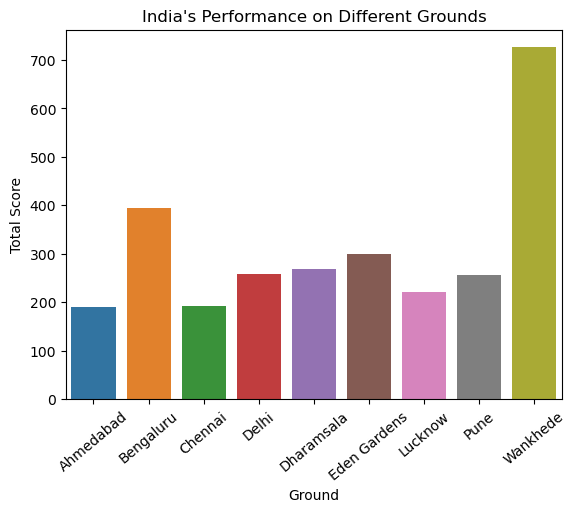

In [90]:
#Top Performance of India per Each Ground
ind_score=data[(data['bat_or_bowl']=='bat') & (data['team']=='IND')].groupby('ground')['runs'].sum()
print(ind_score)

#vizualisation
sns.barplot(x=ind_score.index,y=ind_score.values)
plt.xlabel("Ground")
plt.ylabel("Total Score")
plt.xticks(rotation=40)
plt.title("India's Performance on Different Grounds")
plt.show()

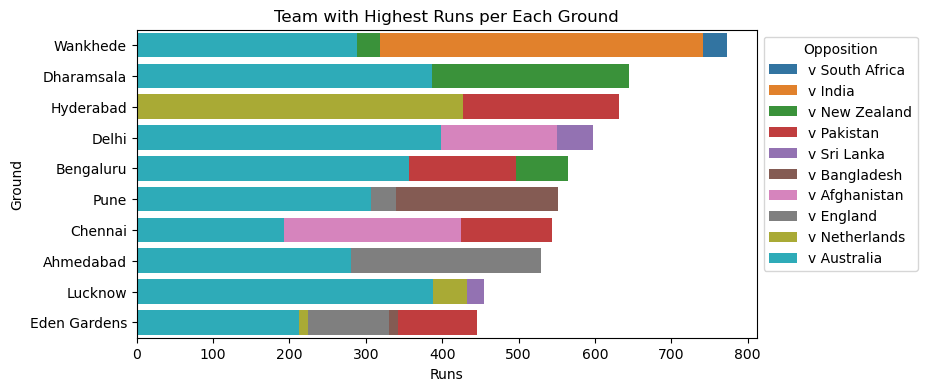

In [92]:
#Gives Barplot of Teams Having Most Runs per Ground
custom_colors = sns.color_palette("tab10", 10)
plt.figure(figsize=(8,4))
sns.barplot(x='runs', y='ground', hue='opposition', data=teams_ground,dodge=False,palette=custom_colors)
plt.xlabel('Runs')
plt.ylabel('Ground')
plt.title('Team with Highest Runs per Each Ground')
plt.legend(title='Opposition', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

4. Temporal Analysis

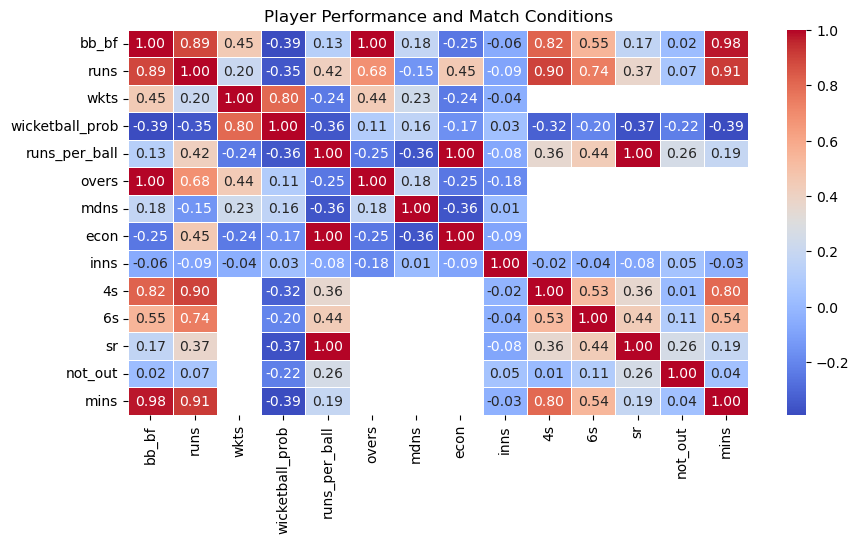

In [93]:
#Vizualisation Using Correlation Matrix
data1= data.select_dtypes(include=[int,float])
selected_data = data1[data1.columns]
correlation_matrix = selected_data.corr()

#Plotting of Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Player Performance and Match Conditions')
plt.show()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_41776\4114899163.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(batting_data['runs'],kde=False)


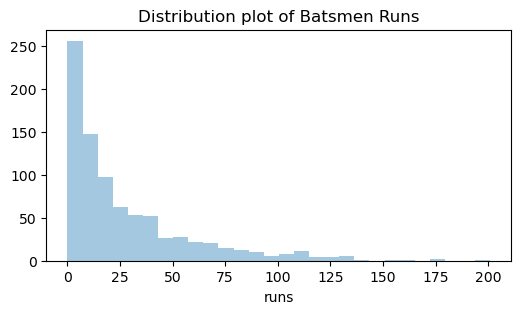

In [94]:
#Distribution wise Analysis
##Batting Distribution
batting_data=data[data['bat_or_bowl']=='bat']
plt.figure(figsize=(6,3))
sns.distplot(batting_data['runs'],kde=False)
plt.title("Distribution plot of Batsmen Runs")
plt.show()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_41776\3396234170.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(batting_data['sr'],kde=False)


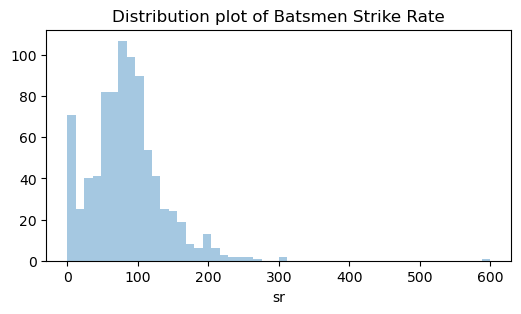

In [95]:
#Strike Rate
plt.figure(figsize=(6,3))
sns.distplot(batting_data['sr'],kde=False)
plt.title("Distribution plot of Batsmen Strike Rate")
plt.show()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_41776\977560693.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bowling_data['wkts'],kde=False)


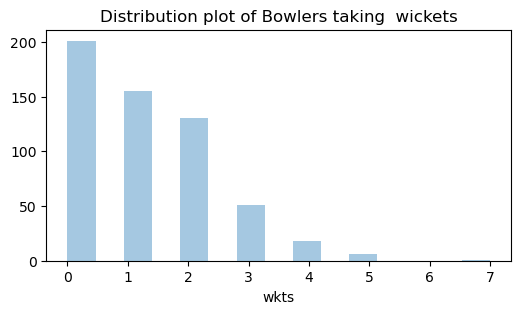

In [96]:
##Bowling Distribution
bowling_data=data[data['bat_or_bowl']=='bowl']
plt.figure(figsize=(6,3))
sns.distplot(bowling_data['wkts'],kde=False)
plt.title("Distribution plot of Bowlers taking  wickets")
plt.show()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_41776\2793607096.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bowling_data['mdns'],kde=False)


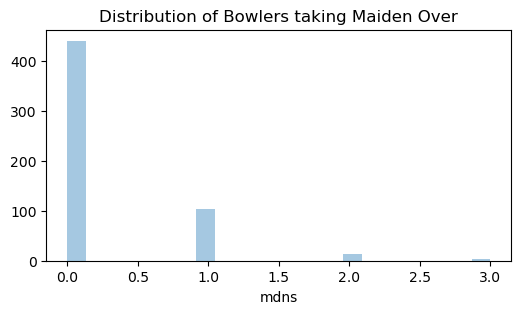

In [98]:
#Maiden Ovrs
plt.figure(figsize=(6,3))
sns.distplot(bowling_data['mdns'],kde=False)
plt.title("Distribution of Bowlers taking Maiden Over")
plt.show()